In [93]:
from scipy.stats import gamma
import scipy.stats as ss
import matplotlib.pyplot as plt
import numpy as np

In [94]:
'''
SVR for R3
'''
# good_dist = [4.5656944444446136e-05, 0.00016747333333330628, 0.0002284191666667234, 0.00029019083333334066, 0.00041617749999990606, 0.00019769472222226875, 6.402472222215489e-05, 0.00013842888888887473, 6.092722222210672e-05, 0.0001248122222221996, 0.0006064963888889039, 0.00027438472222225067, 0.0013710188888888847, 0.0004181041666665732, 0.0019144622222222324, 0.00045616000000001057, 0.00031372222222226034, 0.00044192999999998796, 0.000803406944444432, 0.0016528333333333165, 0.0003066816666665996, 0.00014868333333327606, 0.0008142422222222113, 0.001165402499999932, 0.00043082249999999104, 0.002062708611111074, 5.963138888881057e-05, 0.00016421916666668475, 0.0004597099999999936, 0.0008096022222222366, 0.00012246444444441928, 8.878583333332343e-05, 2.900833333331545e-05, 0.00022854388888888947, 0.00027200055555548556, 3.139972222220488e-05, 8.605111111110872e-05, 0.00011656222222223108, 2.6548888888902226e-05, 8.251888888888086e-05, 4.490000000003806e-05, 3.1236666666656934e-05, 1.5009166666659198e-05, 1.3052777777809087e-06, 1.9767500000018645e-05, 1.3254722222238054e-05, 1.3888888888966732e-06, 1.045277777784384e-06, 3.071666666659951e-06, 3.741666666660912e-07]

# bad_dist = [6.069250000000494e-05, 0.00023352749999998247, 0.0004947294444444866, 0.00039158583333335806, 0.0007928705555555039, 0.0008447219444444494, 0.0007804766666665896, 0.0006606972222221595, 0.00021293888888890885, 0.0006284394444444437, 0.0001523325000001418, 0.0004991994444444154, 0.0030003177777778284, 0.0015909969444445307, 0.002614856944444482, 0.0021390930555555666, 0.0077285941666667005, 0.004396739166666703, 0.008299393333333412, 0.010608012222222159, 0.014847370000000002, 0.007372549444444465, 0.009222219444444553, 0.01571823138888897, 0.012706838333333421, 0.015480595277777792, 0.019162027777777875, 0.02212390027777796, 0.023726210277777826, 0.024096046388888973, 0.02420878138888893, 0.024073665555555606, 0.024964906666666734, 0.02978435944444459, 0.030502073888889016, 0.028672933055555624, 0.028667789166666777, 0.030830093611111237, 0.03327028027777794, 0.0327216819444446, 0.033554540833333465, 0.034129305277777994, 0.03500417666666679, 0.034989396944444605, 0.03409925555555572, 0.03528052083333348, 0.036366361388889025, 0.03673577722222232, 0.036251426666666794, 0.03672074861111133]
good_dist = [4.464638888889654e-05, 0.0001915144444444165, 0.00021925972222226937, 0.0002651930555555615, 0.00017535527777771877, 0.0002668913888889265, 0.0003018869444443807, 0.00047375611111109654, 0.0007549794444444849, 0.00016854555555555206, 0.0005455247222221353, 0.0006092452777778411, 0.0004964899999999966, 0.00025343749999988006, 0.0004268266666666836, 0.0015376588888889008, 0.00010384333333334373, 0.00017823333333334863, 0.0009743136111110928, 4.30055555556948e-06, 0.0002659272222222497, 0.0015200605555555006, 0.00066721388888885, 0.0011827702777777158, 0.002324436944444429, 0.00015770916666655666, 0.000455750277777881, 0.0007996836111110919, 0.0007978033333333153, 0.0007297233333333159, 0.00026817555555556883, 4.133805555556365e-05, 0.00021487222222225347, 9.280388888891216e-05, 7.713999999994125e-05, 8.953305555556746e-05, 4.598000000000845e-05, 4.114333333335126e-05, 1.0175555555543914e-05, 1.0317777777803239e-05, 3.12811111110713e-05, 5.255555555450076e-07, 3.4414722222212685e-05, 4.771083333332406e-05, 1.1589166666689117e-05, 3.574166666677614e-06, 8.113333333340153e-06, 1.8550833333324333e-05, 1.1007777777784298e-05, 2.1830555555523486e-06]
bad_dist = [6.022694444445333e-05, 0.00013479361111109063, 0.0003973672222222541, 0.0002236313888889105, 0.0002223144444445087, 0.0005790013888888898, 0.0016706966666665884, 0.0018227005555554862, 0.0011577705555555955, 0.0007639944444444188, 3.988305555547699e-05, 0.00036764222222216824, 0.003485768888888924, 0.003344272500000093, 0.0016598030555555884, 0.003705757500000056, 0.005029406944444488, 0.008281084166666695, 0.0062322772222222645, 0.006078516666666693, 0.012786158333333325, 0.011761258888888917, 0.00986716277777781, 0.01301679138888897, 0.01096708277777785, 0.019599694722222272, 0.01709918833333338, 0.0193390680555556, 0.02344355750000009, 0.02237158694444454, 0.023947899166666703, 0.027616265000000147, 0.028303677777777925, 0.029714688333333496, 0.028000071111111156, 0.031376645833333494, 0.028700013611111144, 0.030197144722222336, 0.029776100277777953, 0.03202347083333337, 0.033093924166666865, 0.035618368611111284, 0.034962768333333484, 0.035638095277778, 0.03575390055555572, 0.03474236638888897, 0.035644611944444654, 0.03627135666666683, 0.0364316233333335, 0.03667682638888902]
print(len(good_dist))
print(len(bad_dist))

50
50


shape  0.5825772822445895
scale 0.0006163443505438808

shape  1.506056739798263
scale 0.0112877324610474


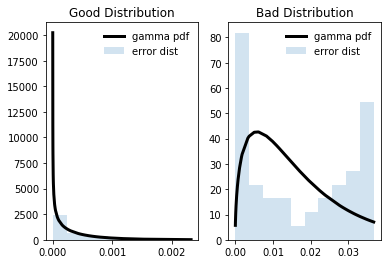

In [95]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False)

x = sorted(good_dist)
mean = np.mean(x)
var = np.var(x)

good_alpha = (mean**2)/var
good_scale = var/mean
print("shape ", good_alpha)
print("scale", good_scale)

# good_alpha, loc, good_scale=ss.gamma.fit(x)
# print()
# print("shape ", good_alpha)
# print("scale", good_scale)

ax1.plot(x, gamma.pdf(x,good_alpha, scale=good_scale), 'k-', lw=3, label='gamma pdf')

ax1.hist(x, density=True, histtype='stepfilled', alpha=0.2, label = 'error dist')
ax1.legend(loc='best', frameon=False)
ax1.ticklabel_format(style='plain')
ax1.set_title("Good Distribution")


x = sorted(bad_dist)
mean = np.mean(x)
var = np.var(x)

bad_alpha = (mean**2)/var
bad_scale = var/mean
print()
print("shape ", bad_alpha)
print("scale", bad_scale)

# bad_alpha, loc, bad_scale=ss.gamma.fit(x)
# print()
# print("shape ", bad_alpha)
# print("scale", bad_scale)


ax2.plot(x, gamma.pdf(x,bad_alpha, scale=bad_scale), 'k-', lw=3, label='gamma pdf')

ax2.hist(x, density=True, histtype='stepfilled', alpha=0.2, label = 'error dist')
ax2.legend(loc='best', frameon=False)
ax2.ticklabel_format(style='plain')
ax2.set_title("Bad Distribution")

plt.show()

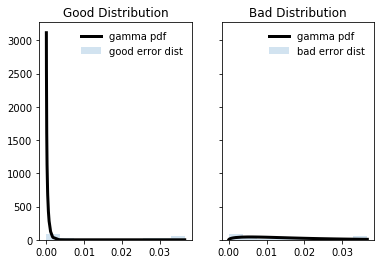

In [96]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)

# x = sorted(good_dist)
# mean = np.mean(x)
# var = np.var(x)

# alpha = (mean**2)/var
# scale = var/mean

ax1.plot(x, gamma.pdf(x,good_alpha, scale=good_scale), 'k-', lw=3, label='gamma pdf')

ax1.hist(x, density=True, histtype='stepfilled', alpha=0.2, label = 'good error dist')
ax1.legend(loc='best', frameon=False)
ax1.ticklabel_format(style='plain')
ax1.set_title("Good Distribution")


# x = bad_dist
# mean = np.mean(x)
# var = np.var(x)

# alpha = (mean**2)/var
# scale = var/mean

ax2.plot(x, gamma.pdf(x,bad_alpha, scale=bad_scale), 'k-', lw=3, label='gamma pdf')

ax2.hist(x, density=True, histtype='stepfilled', alpha=0.2, label = 'bad error dist')
ax2.legend(loc='best', frameon=False)
ax2.ticklabel_format(style='plain')
ax2.set_title("Bad Distribution")

plt.show()

0.0016268188888889001
275


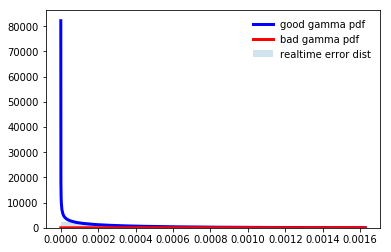

In [97]:
# x = [7.222222222228088e-09, 4.999999999974721e-08, 3.3333333332388396e-09, 1.4555555555570606e-07, 9.083333333347251e-08, 2.924999999998505e-07, 2.419444444446589e-07, 2.1250000000024313e-07, 4.755555555557075e-07, 6.827777777776149e-07, 3.272222222221576e-07, 5.322222222220703e-07, 4.849999999998511e-07, 6.266666666663114e-07, 5.827777777779626e-07, 7.222222222221717e-07, 6.694444444442253e-07, 8.05555555555393e-07, 1.2736111111104643e-06, 1.223055555555628e-06, 1.2549999999999924e-06, 1.1066666666663832e-06, 1.3522222222224722e-06, 1.1102777777771715e-06, 1.273055555554724e-06, 1.3941666666663163e-06, 1.5847222222224342e-06, 1.389166666666172e-06, 1.2730555555548127e-06, 1.1019444444434527e-06, 1.3213888888885919e-06, 1.5730555555556249e-06, 1.4041666666668322e-06, 1.6097222222221106e-06, 1.718055555555235e-06, 1.3174999999994444e-06, 1.713333333332788e-06, 1.6499999999998288e-06, 2.1108333333323764e-06, 2.2097222222216924e-06, 2.4697222222225433e-06, 1.886944444444156e-06, 3.305277777777934e-06, 2.496388888888543e-06, 3.4777777777776924e-06, 3.4700000000001883e-06, 5.098333333333965e-06, 5.650555555556415e-06, 5.32833333333388e-06, 7.90444444444538e-06, 8.011111111110342e-06, 5.59111111111132e-06, 5.342222222221973e-06, 1.022111111111038e-05, 9.898611111109962e-06, 8.326111111109604e-06, 1.6269444444444006e-05, 1.4324444444441267e-05, 2.043944444444127e-05, 2.4201388888887155e-05, 1.9909999999996982e-05, 2.5608611111109578e-05, 1.793333333333288e-05, 2.692611111110938e-05, 4.408805555555389e-05, 2.530888888888775e-05, 3.1594999999997125e-05, 3.140388888888752e-05, 3.7819166666666604e-05, 5.444138888888624e-05, 4.755416666666524e-05, 4.544000000000095e-05, 3.7501666666662364e-05, 5.7131111111108445e-05, 5.493083333332922e-05, 7.915083333333707e-05, 6.639972222222548e-05, 8.001249999999992e-05, 8.950277777777694e-05, 7.965083333333498e-05, 9.140000000000325e-05, 9.45616666666693e-05, 9.229388888889003e-05, 0.00010643944444444621, 0.00011991611111111306, 9.577916666666614e-05, 0.00011998833333333407, 0.00011649138888888741, 0.00012551416666666578, 0.00013034527777777517, 0.00013816833333333374, 0.00013875083333333467, 0.00015530277777777503, 0.00014975888888888776, 0.00016553527777777647, 0.0001673236111111076, 0.0001742291666666614, 0.00016011500000000359, 0.00016453138888888647, 0.00017671361111110638, 0.00018573972222221409, 0.00018861999999999292, 0.00019604888888888347, 0.00020100749999999882, 0.00021693027777777872, 0.00020300249999999833, 0.00020804749999999472, 0.00020909916666666137, 0.00020433638888888754, 0.00021975805555555041, 0.0002240911111111031, 0.00022480277777776883, 0.00023749805555555343, 0.00022540944444443824, 0.000233070833333325, 0.0002324655555555524, 0.00023368527777777376, 0.00023674388888888167, 0.0002370916666666676, 0.00023926305555555186, 0.00024046138888887607, 0.0002462447222222233, 0.00024057416666666568, 0.0002513308333333284, 0.0002506450000000066, 0.00025348305555555835, 0.00025317305555555634, 0.0002499563888888878, 0.00024959638888888224, 0.00025842833333333354, 0.0002656938888888914, 0.0002582486111111102, 0.0002615624999999988, 0.0002730980555555603, 0.0002686063888888848, 0.00027196472222222373, 0.000273204166666669, 0.00028562444444444734, 0.00026798305555555263, 0.000297043055555556, 0.00028212611111111976, 0.0002899655555555579, 0.00031924888888889213, 0.0003077055555555613, 0.0003063897222222248, 0.00030533500000000364, 0.00030626583333333567, 0.0003135100000000039, 0.0003224622222222285, 0.0003425013888888944, 0.0003361477777777816, 0.0003591330555555616, 0.00034194472222222094, 0.0003711038888888884, 0.00040961194444444587, 0.000371556666666667, 0.0003811911111111188, 0.0004344344444444447, 0.0004329038888888829, 0.00046472388888888535, 0.00044474555555555753, 0.0004082561111111116, 0.00045332638888889216, 0.0004953124999999963, 0.0004996647222222176, 0.0005331208333333215, 0.0004972024999999874, 0.0005193469444444374, 0.0005392047222222034, 0.0005477122222222209, 0.0006013924999999848, 0.0005432952777777706, 0.000574031944444439, 0.0005869352777777629, 0.0005829549999999957, 0.0005900624999999962]
x = [8.666666666675606e-08, 1.8333333333307094e-08, 9.666666666631482e-08, 3.736111111108401e-07, 1.7416666666640744e-07, 3.9249999999952254e-07, 3.8805555555540476e-07, 3.4722222222220244e-07, 4.561111111111366e-07, 1.231111111111136e-06, 5.733333333334044e-07, 7.155555555554769e-07, 4.966666666667003e-07, 7.849999999995385e-07, 8.28333333332887e-07, 4.92222222221724e-07, 7.699999999996281e-07, 9.124999999997532e-07, 9.00833333332776e-07, 1.090555555555604e-06, 9.59444444444354e-07, 1.3144444444439032e-06, 1.178055555555196e-06, 1.1774999999999885e-06, 1.3274999999997334e-06, 1.2330555555550286e-06, 1.470833333333188e-06, 1.3069444444439776e-06, 1.2736111111109972e-06, 1.3336111111107866e-06, 1.2280555555554763e-06, 1.370277777777519e-06, 1.6674999999998464e-06, 1.7080555555554694e-06, 1.8519444444450098e-06, 1.717777777777725e-06, 1.672222222222303e-06, 1.8374999999994683e-06, 1.7602777777774181e-06, 2.032499999999862e-06, 2.9563888888882247e-06, 1.431944444444382e-06, 4.583611111109897e-06, 2.953888888888837e-06, 2.590555555556428e-06, 6.2705555555547096e-06, 5.906111111112379e-06, 5.808888888889446e-06, 6.2222222222220936e-06, 6.3077777777772105e-06, 4.245555555555207e-06, 9.76111111111081e-06, 1.0783333333330774e-05, 1.1678611111109593e-05, 9.616111111109968e-06, 1.1421111111110358e-05, 1.0130555555554618e-05, 1.1399444444442509e-05, 1.8204722222219933e-05, 1.572666666666588e-05, 2.2381388888885607e-05, 2.1840555555553324e-05, 3.213999999999702e-05, 2.6330277777776563e-05, 2.5911111111111268e-05, 3.1648333333333435e-05, 3.064388888888631e-05, 3.692527777777284e-05, 4.4369722222222295e-05, 3.930083333333106e-05, 4.5523888888883903e-05, 4.5827222222219427e-05, 4.5979444444445746e-05, 5.16608333333335e-05, 7.111916666666569e-05, 7.382194444444437e-05, 8.5768055555555e-05, 7.199833333333745e-05, 7.852694444444865e-05, 7.345333333333576e-05, 8.954666666666973e-05, 8.547444444444475e-05, 0.00010665277777777954, 0.0001154683333333316, 0.00011268583333333678, 0.0001088138888888906, 0.00013000972222222104, 0.00011979694444444277, 0.00012224805555555683, 0.00012867611111110915, 0.0001289447222222245, 0.00014785055555555145, 0.00013868166666666597, 0.00016205916666666592, 0.00016568861111110613, 0.00015619027777777567, 0.00015288000000000197, 0.00017149916666666358, 0.00017347083333332848, 0.00019003249999999282, 0.00018078777777776856, 0.00019477999999999168, 0.00018928638888888568, 0.00021638138888888502, 0.0001950130555555468, 0.00019853249999999528, 0.0002224663888888884, 0.00021866472222221916, 0.00021686638888888645, 0.00023501444444442953, 0.00022182611111110298, 0.00023388694444443465, 0.0002360750000000041, 0.00023721027777777733, 0.00023564499999999223, 0.0002398736111110984, 0.0002451349999999947, 0.00024328444444443668, 0.0002382713888888779, 0.00023944138888888462, 0.0002476791666666674, 0.00024700916666666297, 0.00024777361111110574, 0.00025050722222221656, 0.0002505069444444419, 0.00024991194444444633, 0.00025209861111110814, 0.0002544080555555536, 0.00025405166666666717, 0.00025783055555555085, 0.000259620277777773, 0.0002642208333333263, 0.0002572730555555581, 0.0002679625000000046, 0.0002579747222222228, 0.00027694527777777725, 0.00026518944444444147, 0.00028244305555555555, 0.0002913975000000021, 0.0002967172222222333, 0.00029177000000000207, 0.0003082577777777884, 0.0002952777777777857, 0.00029875194444444706, 0.00031507111111111444, 0.00031157416666667456, 0.0003300455555555552, 0.0003451838888889007, 0.00034600472222222383, 0.0003519922222222263, 0.0003376036111111164, 0.0003504986111111226, 0.0003947377777777755, 0.00039357694444444477, 0.00038152833333332693, 0.0003884283333333419, 0.00043546611111110206, 0.00039266555555554964, 0.0004292149999999919, 0.00041592111111111454, 0.0004920633333333256, 0.0004431380555555473, 0.000497944166666665, 0.0004941663888888839, 0.0005004063888888883, 0.0005246758333333235, 0.0005320580555555424, 0.000511700277777771, 0.0005437411111110969, 0.0005464269444444293, 0.0005579202777777596, 0.0005767324999999914, 0.0005511663888888731, 0.00058006166666666, 0.0005854024999999874, 0.0006023719444444255, 0.000594133055555542, 0.0006092591666666477, 0.0006200402777777672, 0.0006154574999999857, 0.000614814444444432, 0.0006177508333333185, 0.0006166163888888769, 0.0006398536111110896, 0.000633270833333312, 0.0006249074999999832, 0.0006438672222221964, 0.0006388308333333189, 0.0006409974999999747, 0.0006465841666666696, 0.0006567491666666612, 0.0006681555555555529, 0.0006576074999999976, 0.0006460433333333215, 0.0006656263888888723, 0.0007130880555555476, 0.0007139866666666543, 0.0006982866666666559, 0.0007092649999999888, 0.0007144605555555272, 0.0007114283333333282, 0.0007179094444444255, 0.0007159216666666456, 0.0007325619444444379, 0.000727780555555539, 0.0007323602777777722, 0.00075080472222221, 0.0007536169444444372, 0.0007446219444444302, 0.0007662897222222172, 0.0007808688888888836, 0.0007596349999999895, 0.0007923113888888791, 0.0008014577777777693, 0.0007827138888888785, 0.0007953769444444324, 0.0008170186111110933, 0.0008172908333333218, 0.0008192441666666506, 0.0008125424999999939, 0.0008411397222222233, 0.0008461252777777664, 0.00083264749999998, 0.0008412549999999885, 0.0008483597222222109, 0.0008714913888888628, 0.0008515322222222161, 0.0008954694444444498, 0.0008930477777777787, 0.0009033916666666556, 0.0009188927777777705, 0.0008919219444444425, 0.0009258713888888942, 0.0009229988888888793, 0.0009721463888888928, 0.0009930480555555607, 0.0009698288888888962, 0.000987368611111106, 0.000998948055555555, 0.0011286525000000142, 0.0010613141666666712, 0.0010371463888888836, 0.0011025113888888836, 0.001085444444444447, 0.0011766641666666557, 0.0011144927777777924, 0.0012144444444444397, 0.0012231172222222212, 0.0012278577777777749, 0.0012192672222222168, 0.0012563594444444392, 0.0012513647222222228, 0.00134134083333334, 0.0013389663888888864, 0.0012892091666666795, 0.001331397222222226, 0.0013430347222222253, 0.0014173394444444533, 0.0014370297222222488, 0.001447483333333347, 0.0014257880555555483, 0.001468367777777793, 0.0014859349999999803, 0.0015241180555555685, 0.0015352444444444475, 0.001499793333333343, 0.0015632052777777648, 0.001537203333333324, 0.001578827500000004, 0.0015790347222222265, 0.001602482499999998, 0.0015858152777777819, 0.0015904502777777704, 0.0016268188888889001, 0.0016250813888889122]
print(max(x))
print(len(x))
x = sorted(x)

fig, ax = plt.subplots()

ax.plot(x, gamma.pdf(x,good_alpha, scale=good_scale), 'b-', lw=3, label='good gamma pdf')
ax.plot(x, gamma.pdf(x,bad_alpha, scale=bad_scale), 'r-', lw=3, label='bad gamma pdf')

ax.hist(x, density=True, histtype='stepfilled', alpha=0.2, label = 'realtime error dist')
ax.legend(loc='best', frameon=False)
ax.ticklabel_format(style='plain')

plt.show()